# Week 11 Exercise

In this notebook exercise, we will have three different cases to practice your learning outcomes in the synchronous session. The demono notebook is available in this link. Please don't worry if you can finish this in class, but please remember to submit your final notebook in the following submission point. It is important for your to receive feedback about this notebook from the instructor as this is helpful in supporting your assignment. 

In [2]:
# Importing all libries we used in this notebook

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # using package of testing VIF in statsmodels
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np

## 01-Case 1 - MBA Data

<center><img src="../Image/businessweek.png" width=600 height=400 /></center>

Consider the data for Business Week’s top U.S. MBA programs in `Excercise_1.csv`. The csv file is available in the data folder of the repo, so please use similar document path to _read_ the csv file. 

Use these data to estimate a multiple regression model to assess whether there is a relationship between the enroll-ment and the following explanatory variables: (a) thepercentage of international students, (b) the percentageof female students, (c) the percentage of Asian Americanstudents, (d) the percentage of minority students, and (e) the resident tuition and fees at these business schools.

Hints of the data analysis process:

1. Loading the data from correct document/folder path - `ExData`
2. Data preparation - renaming variable and cleaning the NaN
3. Data analysis - using the sm regression method not the smf with formula api
4. Data interpretation - check the demo notebook to interpret the VIF values

In [ ]:
# 1 loading the data to a new dataframe you may named it as df_MBA (Solution)
df_MBA = pd.read_csv('../ExData/Exercise_1.csv')
df_MBA.head()

In [ ]:
# 2 renaming the variable names that are required in this case study (solution)
df_MBA = df_MBA.rename(columns={'Pct International':'Pct_International', 
                                'Pct Female':'Pct_Female', 
                                'Pct Asian American':'Pct_Asian_American',
                                'Pct Minority':'Pct_Minority', 'Resident Tuition, Fees':'Resident_Tuition'})
df_MBA.head()

In [ ]:
# 3 droping the missing values use dropna function to the dataframe (solution)
df_MBA = df_MBA.dropna()
df_MBA.head(10)

In [ ]:
# 4a building your regression model via the new approch I introduced (solution)

y = df_MBA.Enrollment
X = df_MBA[["Pct_International","Pct_Female","Pct_Asian_American","Pct_Minority","Resident_Tuition"]].assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

In [ ]:
# 4b calculating the VIF values

# using the vif function to obtain the vif value of the independent variables

vif = [variance_inflation_factor(exog=X.values, exog_idx=i) for i in range(X.shape[1])]

# creating a new dataframe to report the results
vif_table = pd.DataFrame({'coef_name': X.columns, 'vif': np.around(vif,3)})
print(vif_table)

### Question 1
Determine whether each of the regression coefficientsfor the explanatory variables in this model is statisti-cally different from zero at the5%significance level.Summarize your findings.

Please type in you answer below:

_______________________________________________

### Question 2
Is there evidence of multicollinearity in this model? Explain why or why not?

Please type in you answer below:

_______________________________________________

## 02-Case 2 Photography Shop (Time series data)

The file `Exercise_2.csv` contains monthly sales for a photography studio and the price charged per portrait duringeach month. 

Use regression to estimate an equation for predicting the current month’s sales from last month’s sales and the current month’s price. 

In this example, we will experience a new method to make the prediction better for the 'time-lagged' effect. Considering the influence of certain practices or company's investment will take time, the effect of independent variables could be lagged. To estimate such effect in the regression model, we can create a lagged variable for the analysis. To create a lagged variable in pandas, we can use the `shift` function. 

For example, if we have a dataframe called `df` and we want to lag the variable of `Satisfaction` for 1 index (all the observations on Satisfaction will lag one row), we can use the below syntax:

`df['lagSatisfaction']=df['Satisfaction'].shift(1)`

In [ ]:
df_Photo = pd.read_csv('../ExData/Exercise_2.csv')

# Using the above example to create a time lagged variable (solution)
# Hints - check observation format and drop NaN

def format(Format):
    return(int(Format.replace('$','').replace(',','')))

df_Photo['Sales'] = df_Photo['Sales'].apply(format)
df_Photo['LagSales'] = df_Photo['Sales'].shift(1) 
df_Photo['Price'] = df_Photo['Price'].apply(format)

df_Photo=df_Photo.dropna()

df_Photo

,Month,Sales,Price,LagSales
1,2,1042000,12,400000.0
2,3,1129000,24,1042000.0
3,4,1110000,18,1129000.0
4,5,1336000,18,1110000.0
5,6,1363000,30,1336000.0
6,7,1177000,27,1363000.0
7,8,603000,24,1177000.0
8,9,582000,36,603000.0
9,10,697000,27,582000.0
10,11,586000,24,697000.0


In [ ]:
# Building a regression model for predicting the current month's sales from last month's sales and current month's price

y = df_Photo.Sales
X = df_Photo[["Price","LagSales"]].assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     20.42
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           3.95e-05
Time:                        09:36:41   Log-Likelihood:                -259.26
No. Observations:                  19   AIC:                             524.5
Df Residuals:                      16   BIC:                             527.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price      -2.408e+04   9004.258     -2.675      0.0

C:\Users\zmh02\Python\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Question 1

Discuss how you can tell whether multicollinearity, or heteroscedasticity might be aproblem. Please refer to the Week 11 Lecture Demo - 1.2.1 Assumption 3 and 2.0 Multicollinearity.

Please type in you answer below:

_______________________________________________

<AxesSubplot:ylabel='Count'>

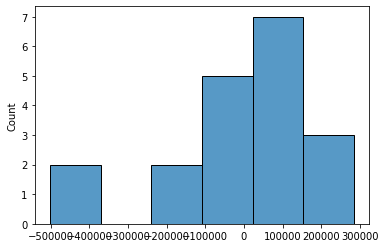

In [ ]:
# Using residual plot to check the heteroscedasticity

sns.histplot(results.resid)

In [ ]:
# Checking the VIF again

# using the vif function to obtain the vif value of the independent variables

vif = [variance_inflation_factor(exog=X.values, exog_idx=i) for i in range(X.shape[1])]

# creating a new dataframe to report the results

vif_table = pd.DataFrame({'coef_name': X.columns, 'vif': np.around(vif,3)})
print(vif_table)

  coef_name     vif
0     Price   1.005
1  LagSales   1.005
2     const  24.928


### Question 2

If the price of a portrait during month 21 is $30, predict month 21 sales.

Please type in you answer below:

_______________________________________________

In [13]:
# (Solution)
# Hint: creating a new dataframe with Price value and LagSales value and assigning a constant values

data = {'Price':30,
        'LagSales':907000},
df = pd.DataFrame(data).assign(const=1)

results.predict(df)

0    762499.338874
dtype: float64

## 03-Additional Case in Preparing the Instructor's Data

The following exercise is relevant to the Instructor's data preparation for the further analysis. While you are allowed to modify the original csv directly, I hope you can use the code purely to finish the data preparation. There are three different points I would like you to experience:

1. Creating a subset of the sample based on certain conditions;
2. Lagging the bariable in a panel dataset.



### 03-1 Creating a new dataframe based on certain conditions

In order to select rows that based on the conditional `value` on certain columns, we can simply use the pandas function of `.loc` the argument of `==`. An example of the code is shown below:

`df.loc[df['column_name'] == value]`

Combining multiple conditions, we can the function of `.betwee`:

`df = df[(df['column_name'] >= A) & (df['column_name'] <= B)]`


In [3]:
# Example - identifying a group of companies in the dataset that is in the industry of Metal Mining (SIC - 1000)
# Creating a new dataframe - df_Mining_Company that only consists of the Metal Mining compnies

df = pd.read_csv('../ExData/Sample 1_CSV_S&P1500_Raw Dataset_Data Analytics in Business Assignment_2021.csv')
df_Mining_Company = df.loc[df['SIC Code'] == 1000]
df_Mining_Company

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
144,CLF UN Equity,Cleveland-Cliffs Inc,2016,US1858991011,1000.0,151040,US,2938.0,1923.9,0.0,NaN,NaN,323.4,34.1085,28.0702,58.9286,2.7800,8.5776,NaN,18.0187
1650,CLF UN Equity,Cleveland-Cliffs Inc,2017,US1858991011,1000.0,151040,US,2938.0,2953.4,0.0,0.0,0.0,1007.7,37.9845,28.0702,58.9286,1.8765,15.0493,NaN,25.0589
3156,CLF UN Equity,Cleveland-Cliffs Inc,2018,US1858991011,1000.0,151040,US,2926.0,3529.6,0.0,0.0,0.0,823.2,42.6357,28.0702,58.9286,1.5173,34.8018,NaN,34.7110


We can also use two-digt SIC Code to define the industry and create a competitor set of the companies. There is a higherachy structure to define the industry sector from the SIC code. Click [here](https://siccode.com/sic-code/20-39/manufacturing) for more information. 

For exmaple, if we consider the whole manufacturing sector this will contains all the company with SIC codes value in the range between 20xx to 39xx. Here, 20 and 39 represent a higher level of the industry cluster. 

With these information, can you define a new dataframe with all the manufacturing companies in S&P 1500?

In [4]:
# Using the information and example above to create a manufacturing companies observations dataframe (Solution)

df_Manufacturing = df[(df['SIC Code'] >= 2000) & (df['SIC Code'] <= 3999)]
df_Manufacturing.head()

,Ticker,Name,Year,ISIN Number,SIC Code,GICS Industry,Country or Territory of Domicile,Number of Employees,Total Assets,R&D Expense,R&D Expense Adjusted,Operating Expenses R&D,Cash and Cash Equivalents,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Tobin's Q Ratio,Return on Assets,Return on Common Equity,Gross Margin
3,NXPI UW Equity,NXP Semiconductors NV,2016,NL0009538784,3674.0,453010,NL,40400.0,24898.0000,1560.000,1520.000,1560.000,1894.0000,40.3101,28.0702,26.7857,1.8811,0.7805,1.7817,42.8406
4,CELH UR Equity,Celsius Holdings Inc,2016,US15118V2079,2086.0,302010,US,39.0,17.7171,0.000,0.000,0.000,11.7471,NaN,3.5088,37.5000,6.2765,NaN,NaN,42.7479
7,BA UN Equity,Boeing Co/The,2016,US0970231058,3721.0,201010,US,150500.0,89997.0000,4626.000,4626.000,4626.000,8801.0000,28.6822,24.5614,55.3571,2.0585,5.4597,140.7718,15.4766
11,CAT UN Equity,Caterpillar Inc,2016,US1491231015,3531.0,201060,US,95400.0,74704.0000,1853.000,1853.000,1853.000,7168.0000,33.3333,38.5965,71.4286,1.5522,-0.0876,-0.4795,25.6818
15,CVX UN Equity,Chevron Corp,2016,US1667641005,2911.0,101020,US,55200.0,260078.0000,476.000,0.000,0.000,6988.0000,47.9339,51.5625,69.6429,1.2964,-0.1895,-0.3333,-0.1287
17,LII UN Equity,Lennox International Inc,2016,US5261071071,3585.0,201020,US,10600.0,1760.3000,64.600,NaN,NaN,50.2000,12.4031,28.0702,55.3571,4.7180,16.1620,400.2882,29.5612
18,KO UN Equity,Coca-Cola Co/The,2016,US1912161007,2080.0,302010,US,100300.0,87270.0000,0.000,0.000,0.000,8555.0000,44.1860,43.8596,58.9286,2.7729,7.3641,26.8512,60.6693
20,PSX UN Equity,Phillips 66,2016,US7185461040,2911.0,101020,US,14800.0,51653.0000,60.000,NaN,NaN,2711.0000,29.4574,38.5965,58.9286,1.4344,3.1028,6.8367,9.8099
21,XOM UN Equity,Exxon Mobil Corp,2016,US30231G1022,2911.0,101020,US,71100.0,330314.0000,1058.000,1058.000,1058.000,3657.0000,53.7190,48.4375,75.0000,1.6269,2.3506,4.6372,6.5803
22,ALG UN Equity,Alamo Group Inc,2016,US0113111076,3523.0,201060,US,2900.0,552.7760,8.847,0.000,0.000,16.7930,NaN,NaN,48.2143,1.8708,6.9265,10.7046,24.2793


### 03-2 Lagging the data across multiple observations

You may find the S&P 1500 is a panel data set with multiple observations and time series data. Panel data is a dataset in which the behavior of entities are observed across time. When considering casual inference, for certain practices and investments as an example, will take time to make the effects. For example, the investment of R&D will not immediately make the effect on current year financial performance (i.e. Tobin's Q). To build a more robust regression model, we may consider a time lagged for the dependent variable.

Similar to the syntax from Case-02, we can use the `.shift()` function to create a new lagged variable. But the following methods I introduce is slightly different, there are several observations, but manageable because only one variable needs to be lagged. 

First, we need to reoganise the dataframe through sorting out sequence, based on Ticker and Year.

We can use the `.sort_values` function. Below is the example, if we have a dataframe name `df_old` with variables `A` and `B`:

`df_new = df_old.sort_values(by='A', 'B')`

With the above syntax, the sequence of the rows will be reorganised as follows: If values in Variable A is equals, then it will sort the values of Variable B (ascending by default). 

In [ ]:
# Sorting the dataframe of S&P 1500 based on Ticker and Year
df_new = df.sort_values(by=['Ticker','Year'])
df_new.head(20)

Next we can use the `.shift()` function to make a one year lag for a given variables.

Hint: If we directly shift the value, some observations may have the data from a different company. Therefore, you will need to use `.grouby()` function to specify the shifting.

Pandas groupby is an inbuilt method that is used for grouping data objects into Series (columns) or DataFrames (a group of Series) based on particular indicators. The groupby in Python makes the management of datasets easier since you can put related records into groups.

If we `grouby` the ticker/company name, the shift will stop and restart for individual group rather than shiftting continously in a whole dataframe. 

Below is the example syntax to enable us grouping variable of `Name` and shifting 1 row for variable `B` then create a new variable `B_lagged`:

`df['B_Lagged'] = df.groupby('Name')['B'].shift(1)`

In [ ]:
# Creating a one-year lagged variable for Return on Assets with the .shift function and grouby 'Ticker' (solution)
df_new['Lag_ROA'] = df_new.groupby('Ticker')['Return on Assets'].shift(1)
df_new.head(20)